In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [515]:
df = pd.read_csv("breast-cancer.csv", sep=';')
df.head()

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-node     286 non-null    object
 5   node-capes   286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [517]:
for col in df:
  print('{col} : {unique}\n'.format(col = col, unique = df[col].unique()))

Class : ['no-recurrence-events' 'recurrence-events']

Age : ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

Menopause : ['premeno' 'ge40' 'lt40']

tumor-size : ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' 'Okt-14' '40-44' '35-39'
 '05-Sep' '45-49']

inv-node : ['0-2' '06-Agu' '09-Nov' '03-Mei' '15-17' 'Des-14' '24-26']

node-capes : ['no' 'yes' '?']

deg-malig : [3 2 1]

breast : ['left' 'right']

breast-quad : ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']

irradiat : ['no' 'yes']



In [518]:
clean_df = df.copy()

clean_df['node-capes']= (clean_df['node-capes']=='yes').astype(int)
clean_df['irradiat']= (clean_df['irradiat']=='yes').astype(int)

Class = {'no-recurrence-events':0, 'recurrence-events':1}
clean_df = clean_df.replace({'Class': Class})
clean_df['Class'] = pd.to_numeric(clean_df['Class'], errors='coerce')

ages = {'20-29':25, '30-39':35, '40-49':45, '50-59':55, '60-69':65, '70-79':75}
clean_df = clean_df.replace({'Age': ages})
clean_df['Age'] = pd.to_numeric(clean_df['Age'], errors='coerce')

menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
clean_df = clean_df.replace({'Menopause': menopause})
clean_df['Menopause'] = pd.to_numeric(clean_df['Menopause'], errors='coerce')

nodes = {'0-2':1, '15-17':16,'24-26':25}
clean_df = clean_df.replace({'inv-node': nodes})
clean_df['inv-node'] = pd.to_numeric(clean_df['inv-node'], downcast='float', errors='coerce')

breast = {'left':1, 'right': 2} 
clean_df = clean_df.replace({'breast': breast})
clean_df['breast'] = pd.to_numeric(clean_df['breast'], errors='coerce')

quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
clean_df = clean_df.replace({'breast-quad': quad})
clean_df['breast-quad'] = pd.to_numeric(clean_df['breast-quad'], downcast='float', errors='coerce')

Tumor = {'30-34':32, '20-24':22, '15-19':17, '0-4':2, '25-29':27, '50-54':52, '40-44':42, '35-39':37, '45-49':47}
clean_df = clean_df.replace({'tumor-size': Tumor})
clean_df['tumor-size'] = pd.to_numeric(clean_df['tumor-size'], downcast='float', errors='coerce')

clean_df[clean_df.isnull().any(axis = 1)]

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
12,0,65,3,NaN,1.0,0,1,1,3.0,0
32,0,55,1,NaN,1.0,0,3,1,2.0,0
33,0,55,2,NaN,1.0,0,1,2,1.0,0
34,0,55,2,NaN,1.0,0,1,1,1.0,0
38,0,45,1,NaN,1.0,0,2,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...
277,1,65,2,NaN,NaN,1,3,1,1.0,1
279,1,55,2,42.0,NaN,1,3,1,2.0,1
280,1,55,2,42.0,NaN,1,3,1,2.0,1
284,1,45,2,32.0,NaN,0,3,1,2.0,0


In [519]:
clean_df.isnull().sum()

Class           0
Age             0
Menopause       0
tumor-size     32
inv-node       66
node-capes      0
deg-malig       0
breast          0
breast-quad     1
irradiat        0
dtype: int64

In [520]:
clean_df = clean_df.dropna().reset_index(drop=True)
clean_df.head(10)

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,0,35,1,32.0,1.0,0,3,1,2.0,0
1,0,45,1,22.0,1.0,0,2,2,3.0,0
2,0,45,1,22.0,1.0,0,2,1,2.0,0
3,0,65,2,17.0,1.0,0,2,2,1.0,0
4,0,45,1,2.0,1.0,0,2,2,4.0,0
5,0,65,2,17.0,1.0,0,2,1,2.0,0
6,0,55,1,27.0,1.0,0,2,1,2.0,0
7,0,65,2,22.0,1.0,0,1,1,2.0,0
8,0,45,1,52.0,1.0,0,2,1,2.0,0
9,0,45,1,22.0,1.0,0,2,2,1.0,0


In [521]:
for col in clean_df:
  print('{col} : {unique}\n'.format(col = col, unique = clean_df[col].unique()))

Class : [0 1]

Age : [35 45 65 55 75 25]

Menopause : [1 2 3]

tumor-size : [32. 22. 17.  2. 27. 52. 42. 37. 47.]

inv-node : [ 1. 16. 25.]

node-capes : [0 1]

deg-malig : [3 2 1]

breast : [1 2]

breast-quad : [2. 3. 1. 4. 5.]

irradiat : [0 1]



In [522]:
X = clean_df[['Age','Menopause','tumor-size','inv-node','node-capes','deg-malig']]
Y = clean_df['Class']

In [523]:
X.head()

,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig
0,35,1,32.0,1.0,0,3
1,45,1,22.0,1.0,0,2
2,45,1,22.0,1.0,0,2
3,65,2,17.0,1.0,0,2
4,45,1,2.0,1.0,0,2


In [524]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [525]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    predict=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, predict)
std_acc[n-1]=np.std(predict==Y_test)/np.sqrt(predict.shape[0])
mean_acc

array([0.60526316, 0.65789474, 0.63157895, 0.73684211, 0.76315789,
       0.73684211, 0.68421053, 0.73684211, 0.73684211])

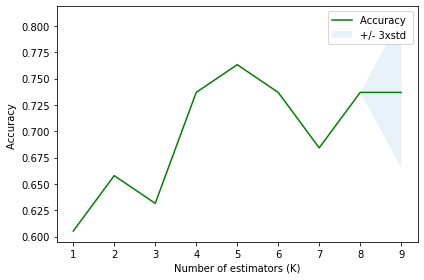

In [526]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators (K)')
plt.tight_layout()
plt.show()

In [527]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7631578947368421 with k= 5


In [528]:
confusion_matrix(Y_test, predict)

array([[28,  0],
       [10,  0]], dtype=int64)

In [529]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, predict)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.2631578947368421
